In [0]:
import numpy as np 
import matplotlib.pyplot as plt 

##Generate some data

In [0]:
N = 23                         # number of training samples
X = np.linspace(0, 10, N)      # training data
Y = 0.5*X + np.random.randn(N) # targets

In [0]:
# mannually create some outliers

# number of "noise" samples
n_outliers = 3

# add some value to the last n_outliers points 
Y[-n_outliers:] += 10

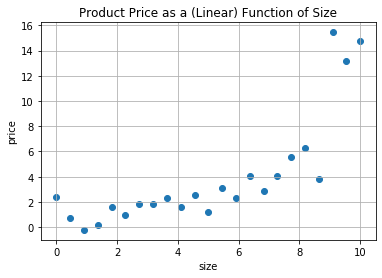

In [11]:
# visualize train set
plt.scatter(X, Y)
plt.xlabel('size')
plt.ylabel('price')
plt.title('Product Price as a (Linear) Function of Size') 
plt.grid()

## Perform linear regression on it

In [0]:
# add the bias term to the data
X = np.vstack((np.ones(N), X)).T

# calculate max likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Y_ml = X.dot(w_ml) # predicted values

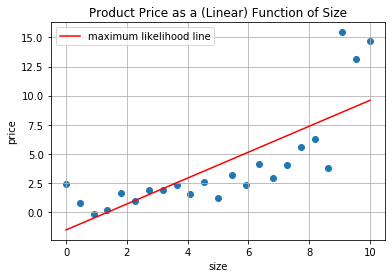

In [13]:
# plot the solution (X without the bias column)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Y_ml, label='maximum likelihood line', color='r')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.title('Product Price as a (Linear) Function of Size')
plt.grid() 

In [0]:
# calculate the main trend

# i.e., max likelihood solution for the same data
# but without outliers
X_cut = X[:-n_outliers]
Y_cut = Y[:-n_outliers]
w_ml_2 = np.linalg.solve(X_cut.T.dot(X_cut), X_cut.T.dot(Y_cut))
Y_ml_2 = X.dot(w_ml_2)

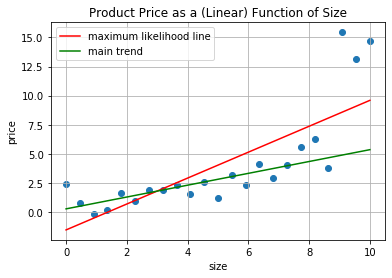

In [15]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Y_ml, label='maximum likelihood line', color='r')
plt.plot(X[:,1], Y_ml_2, label='main trend', color='g')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.title('Product Price as a (Linear) Function of Size')
plt.grid() 

## Apply L2-regularization (Ridge regression)

In [0]:
lmd = 1000 # hyperparameter
w_reg = np.linalg.solve(((X.T.dot(X)) + lmd*np.eye(2)), X.T.dot(Y))
Y_reg = X.dot(w_reg)

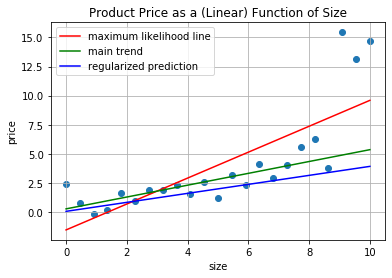

In [17]:
# visualize as usual
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Y_ml, label='maximum likelihood line', color='r')
plt.plot(X[:,1], Y_ml_2, label='main trend', color='g')
plt.plot(X[:,1], Y_reg, label='regularized prediction', color='b')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.title('Product Price as a (Linear) Function of Size')
plt.grid()